In [ ]:
from sklearn.utils import resample

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('file_name')

##### Lifecycle of DS project:
##### 1. Feature Engineering:  Check & Handel missing value, vusualize the data, Scale the data based on distributions
##### 2. Plot some graphs to get an idea and do some more Feature Engineering
##### 3. Handel Categorical data 
##### 4. Do some more cleaning

In [ ]:
import pandas as pd
df=pd.read_csv('Bank_data.csv')

#### Handling missing Values
##### **Missing value for numerical data:**

##### 1. Deleting Rows with missing values : 
##### When there is a small no. of rows with miss values eg: 2% rows have miss

##### 2. Impute missing values with Mean/Median:

##### **For Categorical:**
##### 1. If small amount is missing, replace with the most frequent category
##### 2. If large amount is missing, then make the missing category a new category

##### Ways to handel missing values: 
##### https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

In [ ]:
# Check for missing values: the non-zero columns have missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Numerical

In [ ]:
# Imputation with mean / median / mode
# For mode extra: a=df['Age'].mode()[0]
df['Column_Name'].fillna(int(df['Column_Name'].mean()), inplace=True)  

In [ ]:
# Drop null rows
# any - if any value is null, all - if all values are null
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
# Categorical

In [ ]:
# Replace with most frequent
# find the most frequent using counts then replace
df['Gender'].value_counts()     # Find the most frequent category

df['Gender'].replace(to_replace = "Male", value = "1",inplace=True)       # Replace

In [ ]:
# Make NULL category a new category
df['Cat_column'].replace(to_replace = np.nan, value = 'New cat')

## Pandas Queries

In [ ]:
df.query('Age>45 and Gender=="Male" and (Geography=="France" or Geography=="Germany") and Balance>50000')

## Model & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = random_state )

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


# Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("\nPrecision Score:",precision_score(y_test,y_pred)*100,"%")
print("\nRecall Score:",recall_score(y_test,y_pred)*100,"%")

## Scaling

### For Gaussian(Normal) distribution or Log Normal distri, use Standard Scaler
### Standard Scaler - Mean = 0 , std = 1 
### Normalization - Values punched between 0 & 1

#### Right skewed data: Apply log, sqrt, reciprocal
#### Left skewed data: Apply square, cube, higher powers


##### Skewness link: https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
column = sc.fit_transform(column)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


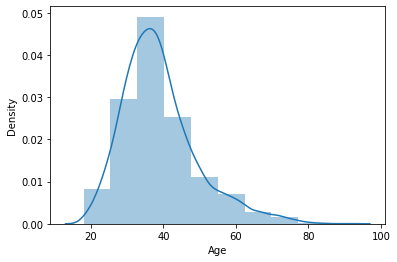

In [ ]:
sns.distplot(df.Age,bins=10)

In [ ]:
df['Age'] = np.log(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


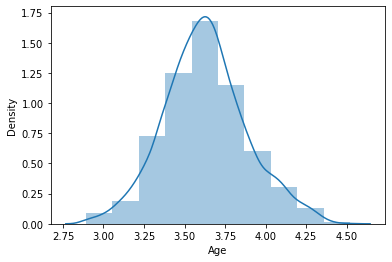

In [ ]:
sns.distplot(df.Age,bins=10)

In [ ]:
df.drop('colm',axis=1,inplace=True)
df.sample(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7567,7568,15750545,Chidiebere,629,France,Male,3.78419,5,0.0,4,0,0,117572.59,1


### Left skewed data spotted

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


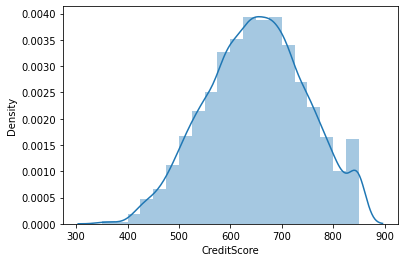

In [ ]:
sns.distplot(df['CreditScore'],bins=20)

### Handeled by applying square over the column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


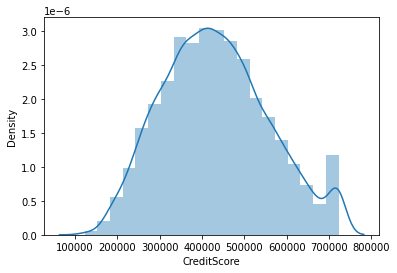

In [ ]:
d=np.square(df['CreditScore'])
sns.distplot(d,bins=20)

In [ ]:
d = np.array(d)
d = d.reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


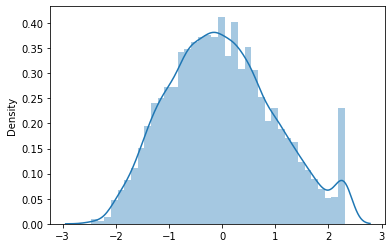

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
d = sc.fit_transform(d)

sns.distplot(d)